# Libraries

! pip install numpy pandas sklearn

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [3]:
# For training the model
X_train_realmean = pd.read_csv("../X/Xtrainmean.csv", index_col=[0])

# For cross validation
X_valid_realmean = pd.read_csv("../X/Xvalidmean.csv", index_col=[0])

# For prediction
X_test_realmean = pd.read_csv("../X/Xtestmean.csv", index_col=[0])

In [4]:
X_train_realmean

,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
3_145834_211552,-0.254460,-1.979855,0.0,0.0,0.0,-0.318615,0.931458,-0.226618,0.000000,-1.694872,...,0.440628,0.000000,0.0,0.0,0.0,0.000000,0.0,1.026004,0.634186,0.160067
6_107064_228232,-0.256599,-0.251806,0.0,0.0,0.0,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
9_150750_220597,-0.269432,0.000000,0.0,0.0,0.0,-0.367050,-0.330641,-0.271686,2.097036,1.019964,...,1.039571,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
11_194540_229441,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.088963,0.000000,0.000000,0.484141,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.139623,0.000000
12_112213_232669,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.240269,0.000000,0.000000,-1.694872,...,0.680205,-1.333059,0.0,0.0,0.0,-0.317391,0.0,0.000000,-0.414731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,0.000000,1.044231,0.0,0.0,0.0,0.000000,-0.572320,0.000000,0.290121,0.091204,...,0.000000,0.000000,0.0,0.0,0.0,-0.361918,0.0,0.584864,-0.156720,0.000000
99973_150202_275083,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.290362,0.000000,-0.677870,-2.230694,...,0.000000,0.000000,0.0,0.0,0.0,-0.364145,0.0,0.973702,0.429243,0.000000
99982_151454_221194,-0.260876,1.044231,0.0,0.0,0.0,-0.297857,-0.330641,-0.261407,0.000000,1.448622,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.443803,-0.682067,0.000000
99991_151118_226241,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.753579,0.000000,0.000000,-0.051682,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.782719,-0.633884,-0.303768


## Task 2

In [5]:
y_train_t2 = pd.read_csv("../Task2/Y_train.csv",index_col=[0])
y_valid_t2 = pd.read_csv("../Task2/Y_valid.csv",index_col=[0])

In [6]:
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

# Process 1. Raw Real Mean

In [7]:
X_feature=X_train_realmean.join(y_train_t2)

### Process 1.1 Important Raw Real Mean Pairplot Visualization

In [8]:
X_feature_plot=pd.DataFrame(X_feature[["diastolic blood pressure","heart rate","temperature","glascow coma scale total","los_icu"]])
X_feature_0=[]
X_feature_1=[]

for i in range(len(X_feature_plot)):
    if X_feature.iloc[i,-1]==0:
        X_feature_0.append(X_feature_plot.iloc[i,:])
    else:
        X_feature_1.append(X_feature_plot.iloc[i,:])

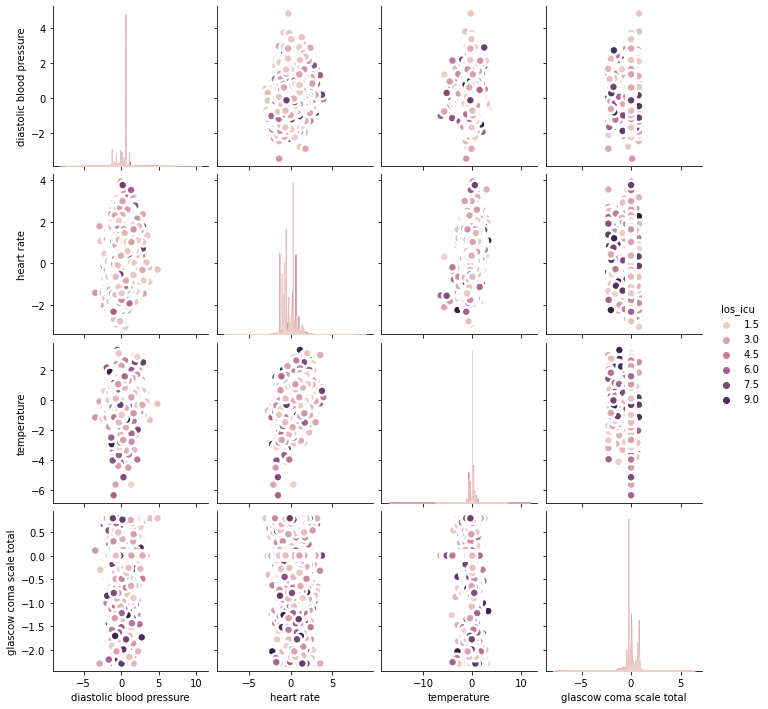

In [9]:
import seaborn as sns
sns.pairplot(X_feature_plot,kind="scatter",hue="los_icu",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

## Process 2: Elimination of features with variance<0.08 (call is"nozero") and Imputation

In [10]:
train=X_train_realmean.join(y_train_t2)
valid=X_valid_realmean.join(y_valid_t2)
test=X_test_realmean

In [11]:
# eliminate feautres with variance  < 0.08
train_low_var = train.var()[train.var()<0.08].index[:-1]
test.drop(train_low_var,axis = 1,inplace=True)
train.drop(train_low_var,axis = 1,inplace=True)
valid.drop(train_low_var,axis = 1,inplace=True)

X_train_nozero = train.copy()
headnozero=X_train_nozero.columns
X_valid_nozero = valid.copy()
X_test_nozero  =test.copy()

In [12]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train_nozero))
X_train_nozero.columns=headnozero
X_train_nozero.index=X_train_realmean.index
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid_nozero))
X_valid_nozero.columns=headnozero
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test_nozero))
X_test_nozero.columns=headnozero[:-1]
X_train_nozero

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,los_icu
3_145834_211552,-0.254460,-1.979855,-0.318615,0.931458,-0.226618,0.014621,-1.694872,-0.298127,0.792807,-1.004507,...,-0.002273,0.800876,0.440628,0.000309,-0.053738,-0.041802,1.026004,0.634186,0.160067,6.064560
6_107064_228232,-0.256599,-0.251806,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,-0.444605,1.737977,-0.016061,...,-0.518339,0.069184,0.052263,0.000309,-0.053738,-0.041802,-0.010417,-0.181589,-0.002132,3.672917
9_150750_220597,-0.269432,0.061017,-0.367050,-0.330641,-0.271686,2.097036,1.019964,-0.395779,-0.439621,0.636039,...,0.101098,0.801063,1.039571,0.000309,-0.053738,-0.041802,-0.010417,-0.181589,-0.002132,5.323056
11_194540_229441,-0.140093,0.061017,-0.052863,-0.088963,-0.136461,0.014621,0.484141,-0.115158,-0.439621,0.910607,...,-0.188482,0.069184,0.052263,0.000309,-0.053738,-0.041802,-0.010417,-0.139623,-0.002132,1.584410
12_112213_232669,-0.140093,0.061017,-0.052863,1.240269,-0.136461,0.014621,-1.694872,-0.115158,0.348021,0.224186,...,-0.157922,0.476344,0.680205,-1.333059,-0.317391,-0.041802,-0.010417,-0.414731,-0.002132,7.634815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,-0.140093,1.044231,-0.052863,-0.572320,-0.136461,0.290121,0.091204,-0.115158,-0.200239,0.407232,...,-1.013160,0.069184,0.052263,0.000309,-0.361918,-0.041802,0.584864,-0.156720,-0.002132,1.703391
99973_150202_275083,-0.140093,0.061017,-0.052863,-0.290362,-0.136461,-0.677870,-2.230694,-0.115158,-0.331513,-0.599519,...,-0.067515,0.069184,0.052263,0.000309,-0.364145,-0.041802,0.973702,0.429243,-0.002132,2.731933
99982_151454_221194,-0.260876,1.044231,-0.297857,-0.330641,-0.261407,0.014621,1.448622,-0.151648,0.116362,0.361470,...,-0.353408,0.069184,0.052263,0.000309,-0.053738,-0.041802,-0.443803,-0.682067,-0.002132,7.949259
99991_151118_226241,-0.140093,0.061017,-0.052863,-0.753579,-0.136461,0.014621,-0.051682,-0.115158,-0.219544,-0.788284,...,0.149653,0.069184,0.052263,0.000309,-0.053738,-0.041802,0.782719,-0.633884,-0.303768,3.142616


In [13]:
X_train_selected_t2=X_train_nozero
X_valid_selected_t2=X_valid_nozero
X_test_selected_t2=X_test_nozero

## Process 3: Normalization ##

In [20]:
scaler = preprocessing.StandardScaler()

X_train_nozero_selected=X_train_nozero.values
X_train_nozero_scaled = scaler.fit_transform(X_train_nozero_selected)
X_train_selected_t2_norm=pd.DataFrame(X_train_nozero_scaled)
X_train_selected_t2_norm.columns=headnozero
X_train_selected_t2_norm.index=X_train_realmean.index
X_train_selected_t2_norm=X_train_selected_t2_norm.drop(columns=["los_icu"])

X_valid_nozero_selected=X_valid_nozero.values
X_valid_nozero_scaled = scaler.fit_transform(X_valid_nozero_selected)
X_valid_selected_t2_norm=pd.DataFrame(X_valid_nozero_scaled)
X_valid_selected_t2_norm.columns=headnozero
X_valid_selected_t2_norm=X_valid_selected_t2_norm.drop(columns=["los_icu"])


X_test_nozero_selected=X_test_nozero.values
X_test_nozero_scaled = scaler.fit_transform(X_test_nozero_selected)
X_test_selected_t2_norm=pd.DataFrame(X_test_nozero_scaled)
X_test_selected_t2_norm.columns=headnozero[:-1]

In [21]:
X_train_selected_t2_norm

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,systolic blood pressure,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
3_145834_211552,-0.286414,-3.364543e+00,-4.668067e-01,1.287299,-0.229497,1.649481e-17,-2.050998,-0.322341,0.934671,-1.793228,...,-0.833087,0.126241,1.198413,6.235952e-01,7.390399e-18,0.000000,0.0,1.283108e+00,0.768159,4.805095e-01
6_107064_228232,-0.291771,-5.157137e-01,-6.491195e-01,2.290083,-0.299940,-1.199707e+00,-1.765362,-0.580397,1.964341,-0.097147,...,1.999349,-0.596546,0.000000,-3.342525e-17,7.390399e-18,0.000000,0.0,-1.073808e-17,-0.190810,3.854277e-18
9_150750_220597,-0.323910,-1.143933e-17,-5.518860e-01,-0.310355,-0.344219,3.300145e+00,1.050202,-0.494378,-0.407936,1.021795,...,2.241001,0.271020,1.198719,1.585315e+00,7.390399e-18,0.000000,0.0,-1.073808e-17,-0.190810,3.854277e-18
11_194540_229441,0.000000,-1.143933e-17,1.218853e-17,-0.004421,0.000000,1.649481e-17,0.438123,0.000000,-0.407936,1.492929,...,-0.862638,-0.134558,0.000000,-3.342525e-17,7.390399e-18,0.000000,0.0,-1.073808e-17,-0.141478,3.854277e-18
12_112213_232669,0.000000,-1.143933e-17,1.218853e-17,1.678215,0.000000,1.649481e-17,-2.050998,0.000000,0.450121,0.315094,...,0.783028,-0.091757,0.666874,1.008283e+00,-2.560233e+00,-0.525055,0.0,-1.073808e-17,-0.464876,3.854277e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,0.000000,1.620908e+00,1.218853e-17,-0.616289,0.000000,4.366027e-01,-0.010735,0.000000,-0.147154,0.629184,...,0.867201,-1.289578,0.000000,-3.342525e-17,7.390399e-18,-0.613730,0.0,7.369685e-01,-0.161576,3.854277e-18
99973_150202_275083,0.000000,-1.143933e-17,1.218853e-17,-0.259366,0.000000,-1.097438e+00,-2.663078,0.000000,-0.290164,-1.098306,...,-0.508974,0.034865,0.000000,-3.342525e-17,7.390399e-18,-0.618163,0.0,1.218356e+00,0.527242,3.854277e-18
99982_151454_221194,-0.302484,1.620908e+00,-4.303441e-01,-0.310355,-0.318055,1.649481e-17,1.539866,-0.064286,0.197751,0.550661,...,-1.471289,-0.365548,0.000000,-3.342525e-17,7.390399e-18,0.000000,0.0,-5.365386e-01,-0.779138,3.854277e-18
99991_151118_226241,0.000000,-1.143933e-17,1.218853e-17,-0.845740,0.000000,1.649481e-17,-0.173956,0.000000,-0.168185,-1.422211,...,2.629713,0.339025,0.000000,-3.342525e-17,7.390399e-18,0.000000,0.0,9.819162e-01,-0.722498,-8.935821e-01


# Data report

In [15]:
print("*"*60)
print("There are 3 set of X for task 2")
print("X_train_selected_t2, X_valid_selected_t2,X_test_selected_t2")
print("-"*60)
print("Normalized version")
print("X_train_selected_t2_norm,X_valid_selected_t2_norm,X_test_selected_t2_norm")
print("-"*60)
print("There are 2 set of Y for task 2")
print("y_train_t2, y_valid_t2")
print("when training, please use: 'y_train_t2_value,y_valid_t2_value'")
print("*"*60)

************************************************************
There are 3 set of X for task 2
X_train_selected_t2, X_valid_selected_t2,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t2_norm,X_valid_selected_t2_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 2 set of Y for task 2
y_train_t2, y_valid_t2
when training, please use: 'y_train_t2_value,y_valid_t2_value'
************************************************************
